In [2]:
import shap
import xgboost

from randomForest import prepareData
from randomForest import runRandomForest
from sklearn.metrics import accuracy_score
from copy import deepcopy
from pandas import read_csv
from pandas import DataFrame



In [3]:
filePath = "../../data/core/uk/final/uk_final.csv"
accuracyListXG = []
accuracyListRF = []
accuracyListXGWal = []
accuracyListRFWal = []

In [18]:
rt = "Rt <= 0.5"

trainingData, trainingRt, testData, testRt = prepareData(filePath, rt)

trainingDataWal, trainingRtWal, testDataWal, testRtWal = prepareData(filePath, rt, True)

In [19]:
noClass = 0
objective = 0

if len(rt) > 2:
    noClass = 2
else:
    noClass = 3
    

objective = "multi:softmax"

In [20]:
params = {
      'colsample_bynode': 0.8,
      'learning_rate': 0.5,
      'max_depth': 5,
      'num_parallel_tree': 100,
      'objective': objective,
      'subsample': 0.8,
      'tree_method': 'gpu_hist',
      'num_class': noClass,   
}

classiferXG = xgboost.train(params, xgboost.DMatrix(trainingData, label=trainingRt), num_boost_round=1)
classiferRF, accuracyRF = runRandomForest(trainingData, trainingRt, testData, testRt)

classiferXGWal = xgboost.train(params, xgboost.DMatrix(trainingDataWal, label=trainingRtWal), num_boost_round=1)
classiferRFWal, accuracyRFWal = runRandomForest(trainingDataWal, trainingRtWal, testDataWal, testRtWal)

[09:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
prediction = classiferXG.predict(xgboost.DMatrix(testData))
predictionWal = classiferXGWal.predict(xgboost.DMatrix(testDataWal))

In [22]:
accuracyXG = accuracy_score(testRt, prediction)
accuracyXGWal = accuracy_score(testRtWal, predictionWal)

In [23]:
accuracyListXG.append(accuracyXG)
accuracyListRF.append(accuracyRF)

accuracyListXGWal.append(accuracyXGWal)
accuracyListRFWal.append(accuracyRFWal)
print(len(accuracyListXG))

3


In [24]:
print(sum(accuracyListXG) / len(accuracyListXG))
print(sum(accuracyListRF) / len(accuracyListRF))

print(sum(accuracyListXGWal) / len(accuracyListXGWal))
print(sum(accuracyListRFWal) / len(accuracyListRFWal))

0.873204247345409
0.9125546533416614
0.9866423800850032
0.9878567091681846


In [25]:
explainer = shap.TreeExplainer(classiferXG)

In [134]:

shapValues = explainer.shap_values(trainingData)

In [135]:
shap.initjs()

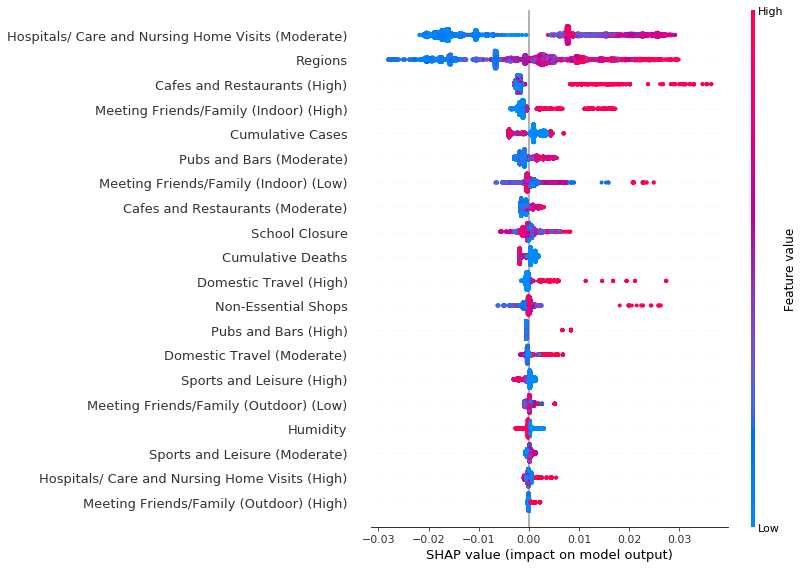

In [137]:
shap.summary_plot(shapValues[0], trainingData)

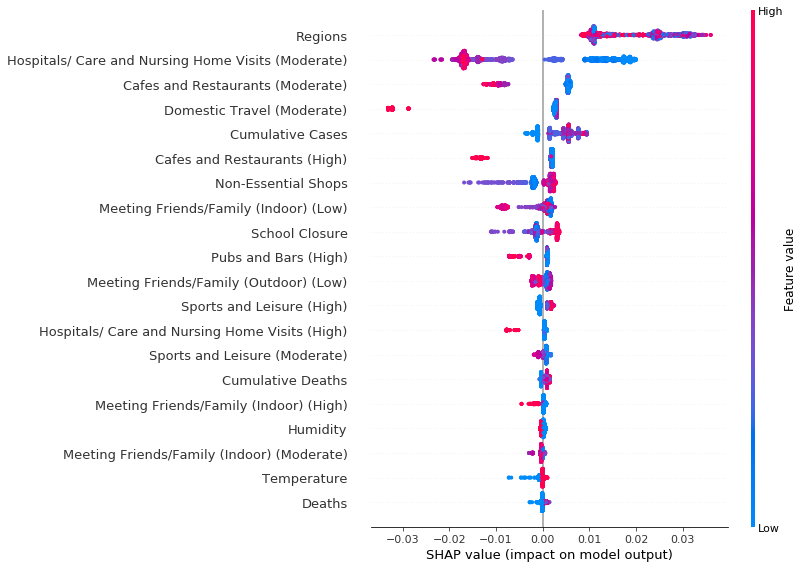

In [133]:
shap.summary_plot(shapValues[1], trainingDataWal)

In [149]:
shap.summary_plot(shapValues[2], trainingData)

IndexError: list index out of range

In [110]:
trainingDataWal.iloc[0,:]

Regions                                                6
Cases                                                  0
Cumulative Cases                                       2
Deaths                                                 0
Cumulative Deaths                                      2
Tests                                                  0
Cumulative Tests                                       0
Meeting Friends/Family (Indoor) (Low)                 37
Meeting Friends/Family (Indoor) (Moderate)            27
Meeting Friends/Family (Indoor) (High)                 0
Meeting Friends/Family (Outdoor) (Low)                37
Meeting Friends/Family (Outdoor) (Moderate)           27
Meeting Friends/Family (Outdoor) (High)                0
Domestic Travel (Low)                                 37
Domestic Travel (Moderate)                             0
Domestic Travel (High)                                 0
International Travel (Low)                            37
International Travel (Moderate)

In [111]:
shap.force_plot(explainer.expected_value[0],
                shapValues[0][1], 
                trainingDataWal.iloc[1])

In [112]:
shap.force_plot(explainer.expected_value[1],
                shapValues[0][1], 
                trainingDataWal.iloc[1])

In [87]:
shap.force_plot(explainer.expected_value[2],
                shapValues[0][1], 
                trainingDataWal.iloc[1])

IndexError: list index out of range

In [113]:
shap.force_plot(explainer.expected_value[0],
                shapValues[0][:100], 
                trainingData.iloc[:100])

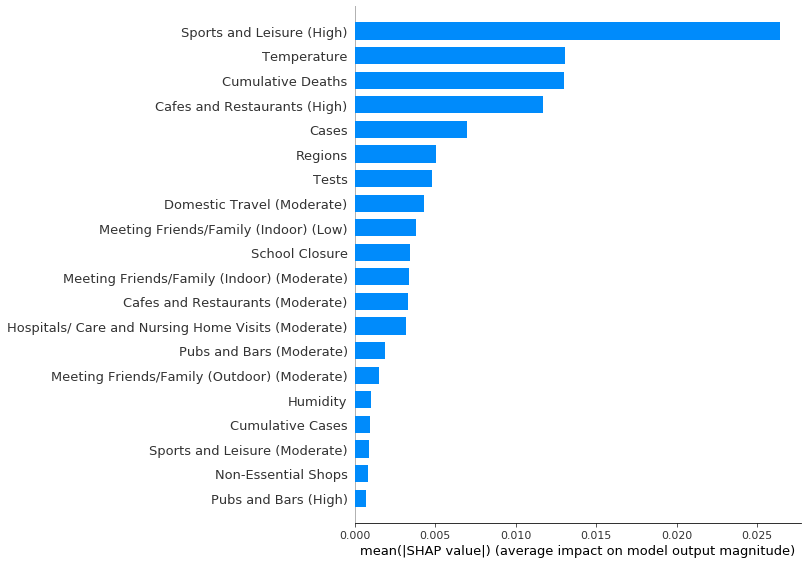

In [114]:
shap.summary_plot(shapValues[0], trainingDataWal, plot_type="bar")

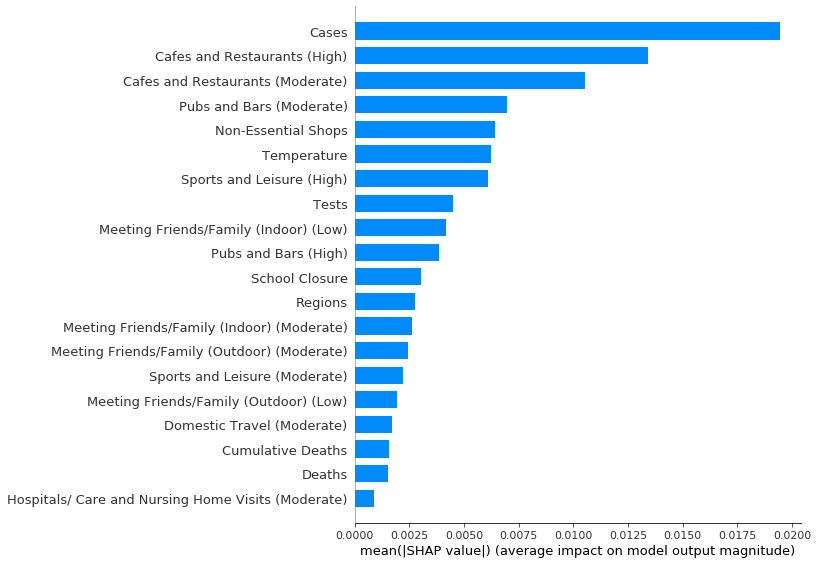

In [115]:
shap.summary_plot(shapValues[1], trainingDataWal, plot_type="bar")

In [156]:
shap.summary_plot(shapValues[2], trainingData, plot_type="bar")

IndexError: list index out of range